In [ ]:
#code for mounting th google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing important libraries for the authentication of google drive
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#authenticating google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Write your dataloader code here. Create more code cells if you find it necessary
import os
import cv2 as cv
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# creation of train dataloader
data='/content/drive/MyDrive/Deep_Learning_Assignment/Classifier_dataset/train'
train_data_1=tf.keras.utils.image_dataset_from_directory(data,image_size=(256,256))

#creation of test dataloader
data_test='/content/drive/MyDrive/Deep_Learning_Assignment/Classifier_dataset/test'
test_data_1=tf.keras.utils.image_dataset_from_directory(data_test,image_size=(256,256))

Found 400 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [ ]:
os.listdir(data)

['Streets', 'Forests']

In [ ]:
train_data_iterator=train_data_1.as_numpy_iterator()
batch=train_data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

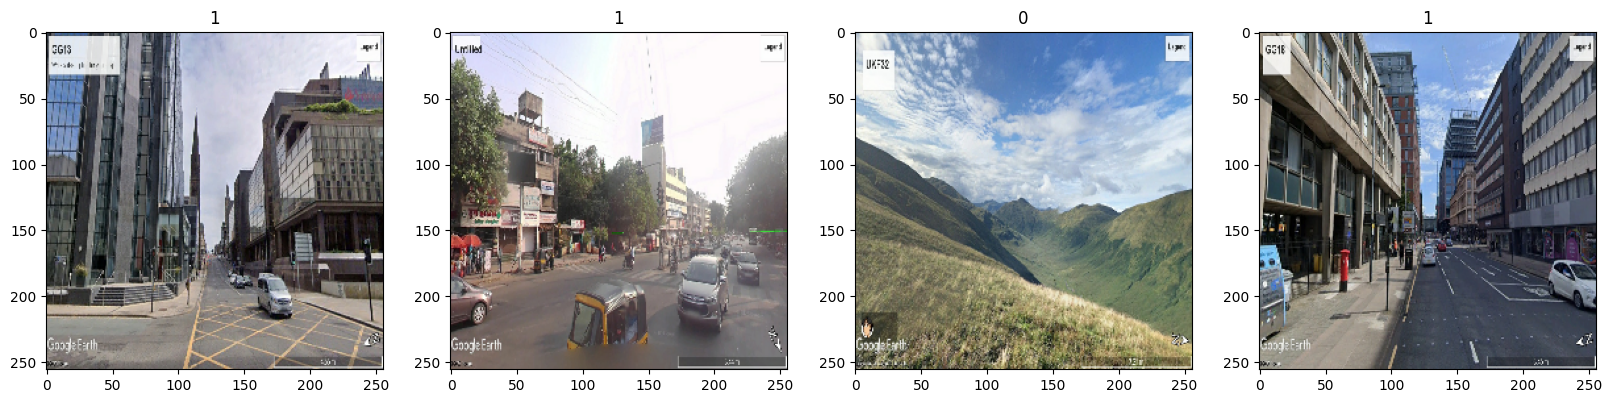

In [ ]:
#Representing the images into the graphs
#IMPORTANT : 0 here represents forests and 1 Represents streets
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#Normalizing values of Train Images between 0 - 1
train_data_1=train_data_1.map(lambda x,y:(x/255,y))

#checking whether the value has been Normalized in the range 0 to 1.
print(train_data_1.as_numpy_iterator().next()[0].max())

#Normalizing values of Test Images between 0 - 1
test_data_1=test_data_1.map(lambda x,y:(x/255,y))

#checking whether the value has been Normalized in the range 0 to 1.
print(test_data_1.as_numpy_iterator().next()[0].max())

1.0
1.0


In [ ]:
# Write your proposed solution code here. Create more code cells if you find it necessary
#building the deep learning model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model=Sequential()

#introducing 3 convolutional layers
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu',))
model.add(MaxPooling2D())

#flattening the output of the third convolutional layer
model.add(Flatten())

#Adding it into dense convolutional layer
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#setting the model's optimizer and loss function
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#Describing the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
#creating the train and test log directory in the tensor flow
logdir='logs'
tensoboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#checking the number of batches for train data
len(train_data_1)

13

In [ ]:
#splitting the data to train and validation
train_size=int(len(train_data_1)*.7)
print(train_size)
val_size=int(len(train_data_1)*.2)+2
print(val_size)

train1=train_data_1.take(train_size)
val1=train_data_1.take(val_size)

9
4


In [ ]:
# Training the model for 10 Epochs
hist=model.fit(train1,epochs=10,validation_data=val1,callbacks=[tensoboard_callback])

Epoch 1/10
9/9 [==============================] - 33s 3s/step - loss: 0.8680 - accuracy: 0.5486 - val_loss: 0.6621 - val_accuracy: 0.5156
Epoch 2/10
9/9 [==============================] - 27s 2s/step - loss: 0.6654 - accuracy: 0.5694 - val_loss: 0.6159 - val_accuracy: 0.6094
Epoch 3/10
9/9 [==============================] - 27s 3s/step - loss: 0.5654 - accuracy: 0.7431 - val_loss: 0.4358 - val_accuracy: 0.8594
Epoch 4/10
9/9 [==============================] - 28s 3s/step - loss: 0.3753 - accuracy: 0.8646 - val_loss: 0.4880 - val_accuracy: 0.7734
Epoch 5/10
9/9 [==============================] - 26s 3s/step - loss: 0.3122 - accuracy: 0.8889 - val_loss: 0.2682 - val_accuracy: 0.9062
Epoch 6/10
9/9 [==============================] - 29s 3s/step - loss: 0.2280 - accuracy: 0.9236 - val_loss: 0.2102 - val_accuracy: 0.9453
Epoch 7/10
9/9 [==============================] - 27s 3s/step - loss: 0.1404 - accuracy: 0.9549 - val_loss: 0.1301 - val_accuracy: 0.9609
Epoch 8/10
9/9 [==================

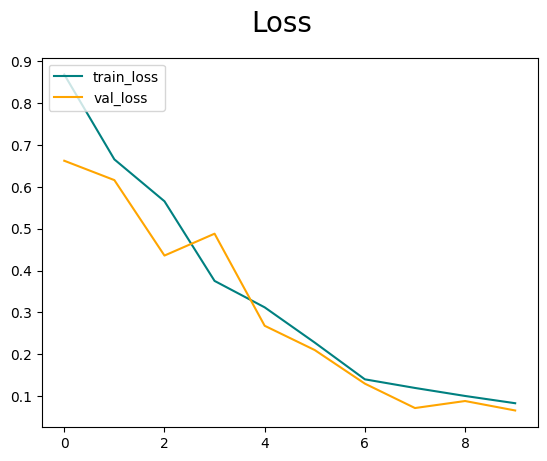

In [ ]:
#Representation of Training and validation loss
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='train_loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

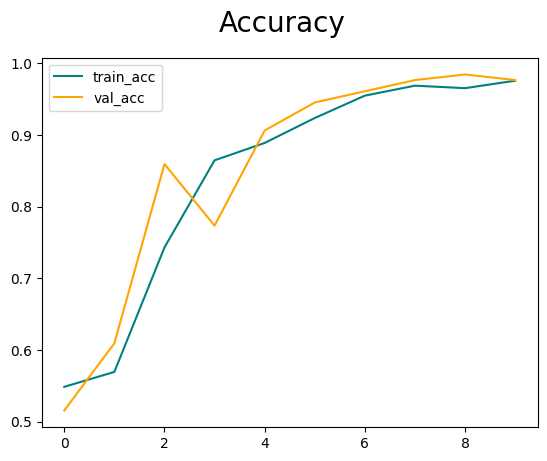

In [ ]:
#Representation of Training and validation Accuracy
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='train_acc')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_acc')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Write your codes for E2 here. Create more code cells if needed
#Importing precicion,recall and accuracy
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
#variable initialization
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [ ]:
for batch in test_data_1.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)

  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 1s 915ms/step


In [ ]:
#printing all test  result paramaters
print(f' Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Test Accuracy: {(acc.result().numpy())*100}%')

 Precision: 0.9587628841400146, Recall: 0.9300000071525574, Test Accuracy: 94.49999928474426%


In [ ]:
#Model Evaluation for test loss
loss,accura=model.evaluate(test_data_1.as_numpy_iterator())

print("Loss = ",loss," Accuracy = ",accura)

7/7 [==============================] - 4s 602ms/step - loss: 0.1405 - accuracy: 0.9450
Loss =  0.14049483835697174  Accuracy =  0.9449999928474426


In [ ]:
#Saving the model
model.save('/content/drive/MyDrive/Personal_Model/img_classifer_1')

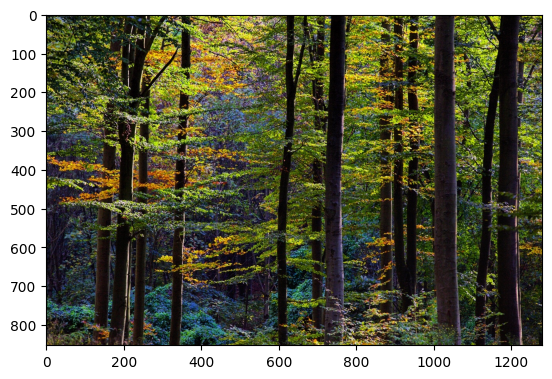

In [ ]:
#Representing the image to be predicted
img1=cv.imread('/content/drive/MyDrive/Deep_Learning_Assignment/other_unseen_data/forests-beech.jpg')
plt.imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
plt.show()

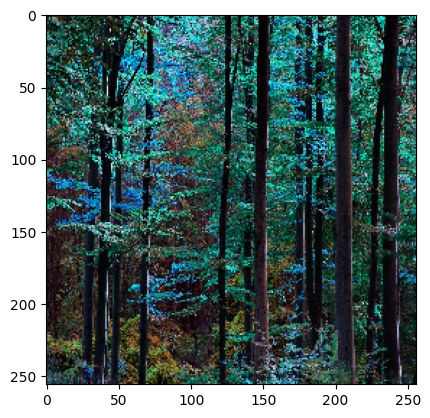

In [ ]:
#Resizing the Image for the compatibility
resize1=tf.image.resize(img1,(256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [ ]:
#output is predicted by inputting augmented image
my_model=tf.keras.models.load_model('/content/drive/MyDrive/Personal_Model/img_classifer.h5')
yhat1=my_model.predict(np.expand_dims(resize1/256,0))

1/1 [==============================] - 0s 143ms/step


In [ ]:
#As described previously, if the outcome of yhat is inclined towards 1 or greater than 0.5 that image will be considered as the street,
#otherwise it is considered as the forest
if yhat1>0.5:
  x1="Street"
else:
  x1="Forest"

In [ ]:
resize2=resize1.numpy().astype(int)

In [ ]:
# Convert the NumPy array 'resize2' to a OpenCV Mat object
resize2_mat = cv2.UMat(resize2.astype('uint8'))

font = cv2.FONT_HERSHEY_SIMPLEX
color = (255, 0, 0)
thickness = 3
font_scale=2
text_size=cv2.getTextSize(x1,font,font_scale,thickness)[0]
text_x=min(50, resize2_mat.get().shape[1] - text_size[0] - 50)
text_y=min(50, resize2_mat.get().shape[0] - text_size[1] - 10)
position = (text_x, text_y)

# Use the Mat object 'resize2_mat' in cv2.putText
cv2.putText(resize2_mat, x1, position, font, font_scale, color, thickness, cv2.LINE_AA)

# If you need to work with a NumPy array later, you can convert it back:
resize2_np = resize2_mat.get()

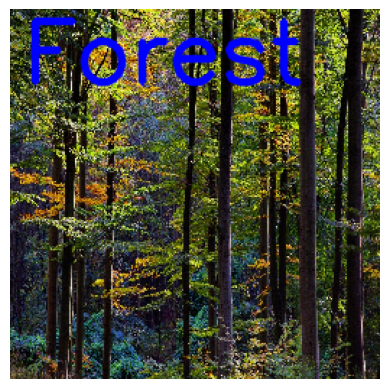

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Assuming 'resize2_mat' is the OpenCV UMat object containing the edited image
resize2_np = resize2_mat.get()  # Convert back to NumPy array if needed

# OpenCV loads images in BGR format, Matplotlib expects RGB
resize2_rgb = cv2.cvtColor(resize2_np, cv2.COLOR_BGR2RGB)

plt.imshow(resize2_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
import cv2

#Function to extract frames from video
def extract_frames(video_path, frame_rate=1):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Initialize variables
    frames = []

    # Set the frame rate
    fps = int(video_capture.get(cv2.CAP_PROP_FPS))

    # Calculate the frame interval
    frame_interval = int(fps / frame_rate)
    print("FPS:", fps)
    print("Frame Interval:", frame_interval)


    # Extract frames
    success, frame = video_capture.read()
    count = 0

    # Loop through each frame
    while success:
        if count % frame_interval == 0:
            frames.append(frame)
        success, frame = video_capture.read()
        count += 1

    # Release the video capture object
    video_capture.release()
    return frames


In [ ]:
#the actual sequence of the code (this is for testing purpose)
resize1=tf.image.resize(img1,(255,255))
yhat1=model.predict(np.expand_dims(resize1/255,0))

NameError: name 'img1' is not defined

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import time

# Function to classify frames and overlay labels on them
def classify_and_overlay_frames(frames, image_classifier_model, target_size, font_scale = 1):
    predictions = []
    inference_times=[]
    for frame in frames:
        img = tf.image.resize(frame, target_size)  # Resize frame to the target size

        # Convert the frame to a NumPy array
        img_array = np.expand_dims(img/256, axis=0)

        # Start the timer
        start_time= time.time()

        # Make prediction
        prediction = image_classifier_model.predict(img_array)

        # End the timer
        end_time=time.time()

        # Calculate inference time
        inference_time=end_time-start_time

        # Append inference time
        inference_times.append(inference_time)

        # Convert the prediction to a binary label
        label = "Forest" if prediction<0.5 else "City"
        predictions.append(label)

        # Overlay the label on the frame
        font = cv2.FONT_HERSHEY_SIMPLEX
        color = (255, 0, 0)
        thickness = 3
        text_size=cv2.getTextSize(label,font,font_scale,thickness)[0]
        text_x=min(50, frame.shape[1] - text_size[0] - 10)
        text_y=min(50, frame.shape[0] - text_size[1] - 10)
        position = (text_x, text_y)


        cv2.putText(frame, label, position, font, font_scale, color, thickness, cv2.LINE_AA)

    return frames, predictions, inference_times


In [ ]:
#Function to save frames to a video
def save_video(frames, output_path, fps=30):
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 format

    #using video writer function
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    #recombining all edited frames into the video.
    for frame in frames:
        video_writer.write(frame)

    video_writer.release()


In [ ]:
# Function to classify and save the video with adjustable font size and position
def classify_and_save_video(video_path, output_path, image_classifier_model, target_size=(256, 256), frame_rate=26, font_size=2):
    frames = extract_frames(video_path, frame_rate)
    overlaid_frames, predictions, inference_times = classify_and_overlay_frames(frames, image_classifier_model, target_size, font_size)
    save_video(overlaid_frames, output_path)
    return predictions,inference_times

# Usage
video_path = '/content/drive/MyDrive/Deep_Learning_Assignment/other_unseen_data/Videos/1_minute_relaxing_video_with_nature_A_minute_with_nature_Flowing_River.mp4'
output_path = '/content/drive/MyDrive/Deep_Learning_Assignment/other_unseen_data/Output_videos/Forest_1_x26.mp4'
image_classifier_model = tf.keras.models.load_model('/content/drive/MyDrive/Personal_Model/img_classifer.h5')
predictions,inference_times = classify_and_save_video(video_path, output_path, image_classifier_model)
print("Frame-by-frame predictions:", predictions)


FPS: 26
Frame Interval: 1
1/1 [==============================] - 0s 37ms/step
Frame-by-frame predictions: ['Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Forest', 'Fo

In [ ]:
#calculating average inference time
inference_time_avg=sum(inference_times)/len(inference_times)

In [ ]:
#printing average inference time
print(inference_time_avg)

0.10763298018423693


In [ ]:
#code for calculating to get the number of frames classified as city and forest
total_frames=len(predictions)
count_city=0
count_forests=0

for prediction in predictions:
  if prediction=="City":
    count_city+=1
  else:
    count_forests+=1

print(f'Total Number of frames:{total_frames} \n Number of frames classiied as cities:{count_city}\n Number of frames classified as forests:{count_forests}')

Total Number of frames:1409 
 Number of frames classiied as cities:1033
 Number of frames classified as forests:376
